In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Read data
df = pd.read_csv('stackedBarValues.csv')

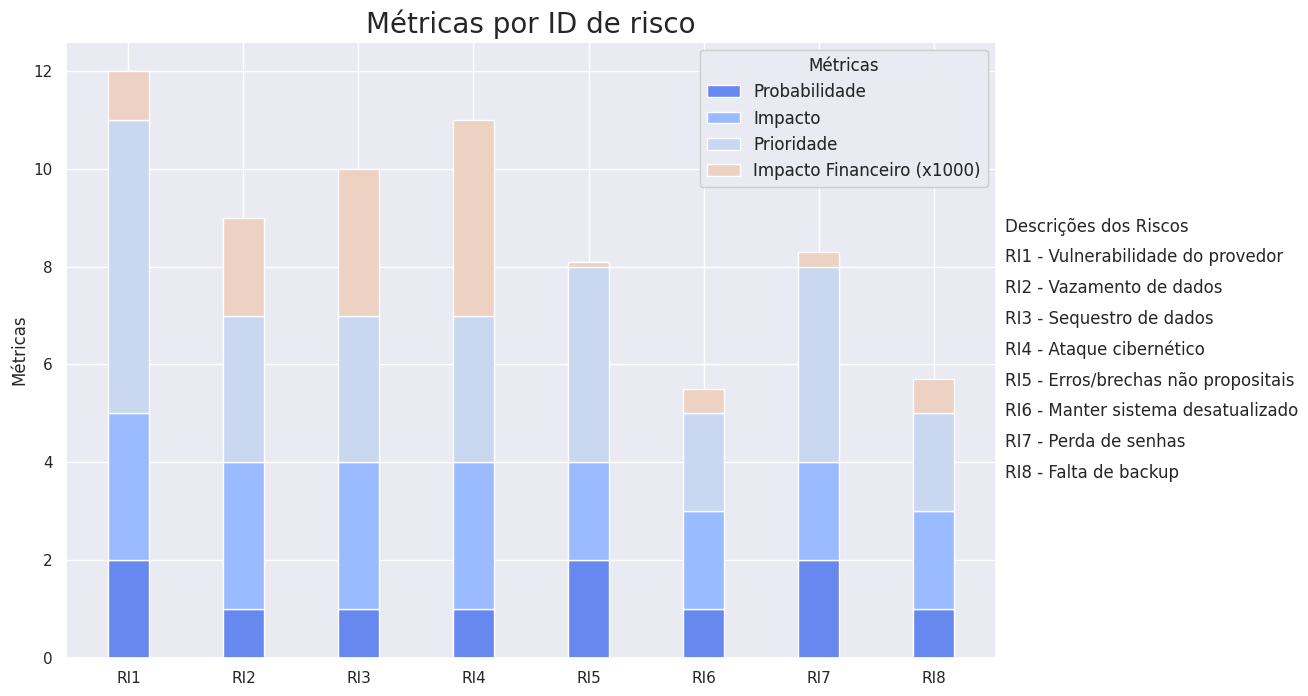

In [4]:
# Plotting configuration

# Color pallet
sns.set_theme(style="darkgrid")
palette = sns.color_palette("coolwarm")


# Normalize Impacto Financeiro
df['Impacto Financeiro'] = df['Impacto Financeiro'] / 1000

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Increase all fonts
plt.rc('font', size=14)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=12)

# Define x-values and width of the bars
x = df['ID']
width = 0.35

# Stack bars
ax.bar(x, df['Probabilidade'], width, label='Probabilidade', color=palette[0])
ax.bar(x, df['Impacto'], width, bottom=df['Probabilidade'], label='Impacto', color=palette[1])
ax.bar(x, df['Prioridade'], width, bottom=df['Probabilidade'] + df['Impacto'], label='Prioridade', color=palette[2])
ax.bar(x, df['Impacto Financeiro'], width, bottom=df['Probabilidade'] + df['Impacto'] + df['Prioridade'], label='Impacto Financeiro (x1000)', color=palette[3])

# Labels and title
ax.set_ylabel('Métricas')
ax.set_title('Métricas por ID de risco')

# Legends for metrics
legend1 = ax.legend(loc='best', bbox_to_anchor=(1, 1), title="Métricas")

# Custom annotations for risk descriptions
total_labels = len(df) + 1
middle_idx = total_labels // 2
initial_y = 0.5 - 0.05 * middle_idx

# Add a title for the risk descriptions
ax.annotate("Descrições dos Riscos", xy=(1.01, 0.5 + 0.05 * middle_idx), xycoords="axes fraction", fontsize=12, verticalalignment='center', horizontalalignment='left')

# Iterate over the DataFrame in reverse order
for i, (idx, row) in enumerate(df.iloc[::-1].iterrows()):
    ax.annotate(f"{row['ID']} - {row['Descrição']}", xy=(1.01, initial_y + 0.05 * i), xycoords="axes fraction", fontsize=12, verticalalignment='center', horizontalalignment='left')

# Add the first legend back
ax.add_artist(legend1)

plt.show()